## Concrete Strength Prediction

#### Concrete, in construction,is a structural material consisting of a hard, chemically inert particulate substance, known as aggregate (usually fine aggregate and coarse aggregate), that is bonded together by cement(binder) and water.
#### Concrete is characterized by the type of aggregate or cement used, by the specific qualities it manifests, or by the methods used to produce it. In ordinary structural concrete, the character of the concrete is largely determined by a water-to-cement ratio. The lower the water content, all else being equal, the stronger the concrete. The mixture must have just enough water to ensure that each aggregate particle is completely surrounded by the cement paste, that the spaces between the aggregate are filled, and that the concrete is liquid enough to be poured and spread effectively. Another durability factor is the amount of cement in relation to the aggregate (expressed as a three-part ratio,cement to fine aggregate to coarse aggregate). Where especially strong concrete is needed, there will be relatively less aggregate.
#### The strength of concrete is measured in pounds per square inch or kilograms per square centimetre of force needed to crush a sample of a given age or hardness. Concrete’s strength is affected by environmental factors, especially temperature and moisture. If it is allowed to dry prematurely, it can experience unequal tensile stresses that in an imperfectly hardened state cannot be resisted. In the process known as curing, the concrete is kept damp for some time after pouring to slow the shrinkage that occurs as it hardens. Low temperatures also adversely affect it's strength.
#### This note book will show the prediction of the compressive strength of concrete using Machine Learning
 

## Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load Dataset

In [3]:
df = pd.read_csv("concrete.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
len(df)

1030

### Shorten Column Names To Enable Ease of Access While Performing Exploratory Data Analysis

In [5]:
new_col_names = ['Cement','BlastFurnanceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','CC_Strength']
pres_col_names = list(df.columns)
new = {}
for i,name in enumerate(pres_col_names):
    new[name] = new_col_names[i]
df = df.rename(columns=new)

In [6]:
df.head()

,Cement,BlastFurnanceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
#check for shape of dataset
df.shape

(1030, 9)

In [8]:
#check for null values
df.isnull().sum()

Cement               0
BlastFurnanceSlag    0
FlyAsh               0
Water                0
Superplasticizer     0
CoarseAggregate      0
FineAggregate        0
Age                  0
CC_Strength          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   BlastFurnanceSlag  1030 non-null   float64
 2   FlyAsh             1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Superplasticizer   1030 non-null   float64
 5   CoarseAggregate    1030 non-null   float64
 6   FineAggregate      1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   CC_Strength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Performing Exploratory Data Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnanceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAsh,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CC_Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Conducting Multivariate Analysis

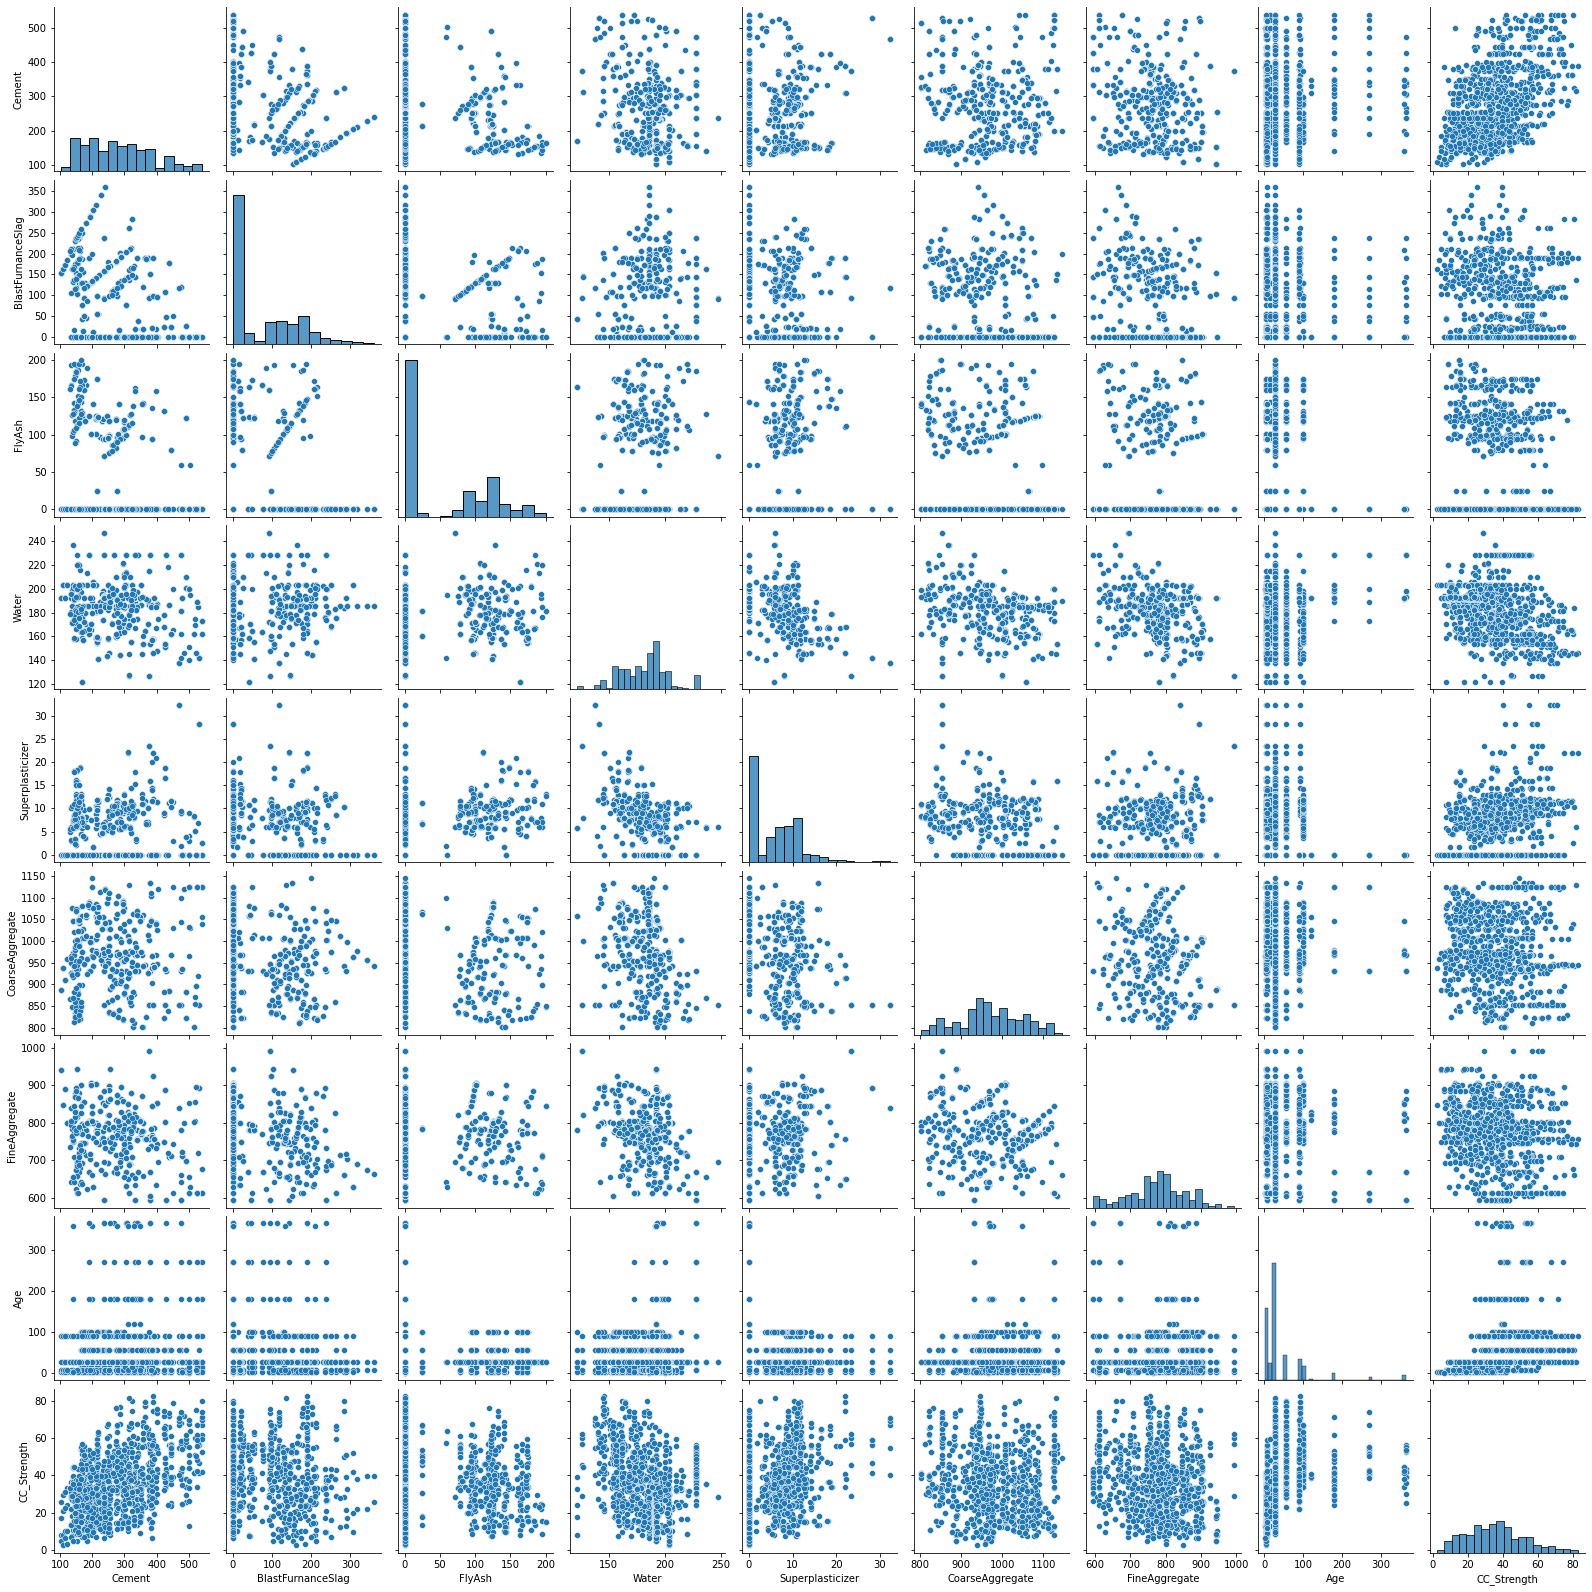

In [11]:
sns.pairplot(df)
plt.show()

#### No strong Correlation between independent variables but it's noticed in the last graph 
#### that there's an increase in the compressive strenght of concrete with the increase in cement

### For Further Analysis I'll Check Further For Correlations Between Variables

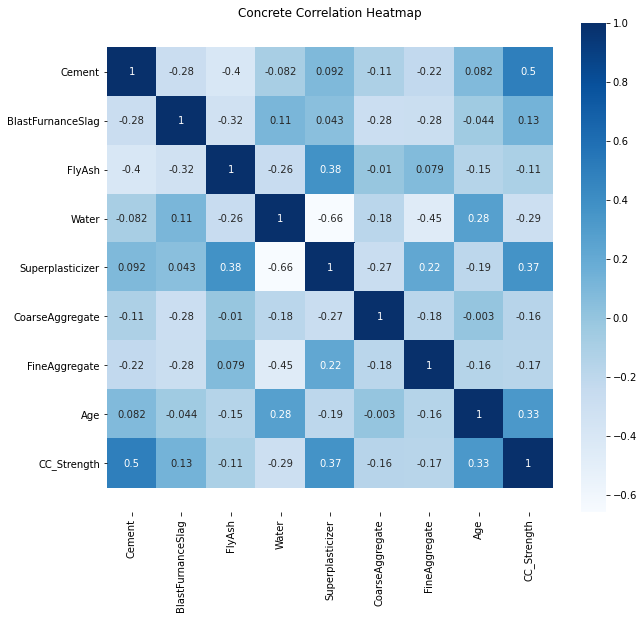

In [12]:
corr = df.corr()
plt.figure(figsize =(10, 9))
sns.heatmap(corr, annot= True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title('Concrete Correlation Heatmap')
plt.show()

#### Observations gotten from the correlation visual data above
#### Three features show considerable high correlation with compressive strength
#### Which are Cement,Age and Superplasticizer
#### Cement shows the the highest and strongest correlation with the compressive strength of concrete at 0.5
#### while Age and Superplasticizers also show considerable high correlation with the compressive strength of concrete at 0.3 and 0.37 respectively.
#### Superplasticizers have a negative high correlation with water and a positive high correlation with Flsyash and fine aggregates
#### NB:When features are correlated against themselves they give a true value of 1 showing the highest form of correlation
#### When features are highly or positively correlated the value of the correlation tends to one(closer)
#### when features are negatively correalted their values move closer to negative 1(-1)

## Further Analysis On Correalations

In [13]:
df.columns

Index(['Cement', 'BlastFurnanceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CC_Strength'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

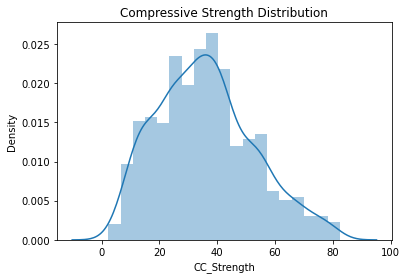

In [14]:
ax = sns.distplot(df['CC_Strength'])
ax.set_title('Compressive Strength Distribution')

## Performing Univariate Analysis

#### 1.PDF:Probability Distribution Functions
#### 2.CDF:Cummulative Distribution Functions
#### 3.Boxplots,Violin plots,Distribution Plots

counts

[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]

[ 2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546 74.573
 82.6  ]


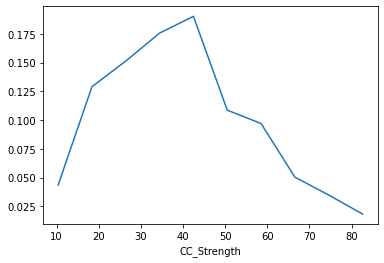

In [15]:
counts,bin_edges= np.histogram(df['CC_Strength'], bins= 10, density = True)
print("counts")
print('')
plt.xlabel('CC_Strength')
pdf = counts/sum(counts)
print(pdf)
print('')
print(bin_edges)
plt.plot(bin_edges[1:],pdf)


[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


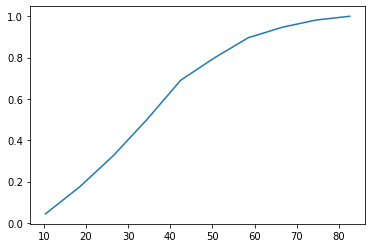

In [16]:
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],cdf)

counts
[0.04368932 0.12912621 0.15145631 0.17572816 0.19029126 0.10873786
 0.09708738 0.05048544 0.03495146 0.0184466 ]
bin_edges
[ 2.33  10.357 18.384 26.411 34.438 42.465 50.492 58.519 66.546 74.573
 82.6  ]
cdf
[0.04368932 0.17281553 0.32427184 0.5        0.69029126 0.79902913
 0.8961165  0.94660194 0.9815534  1.        ]


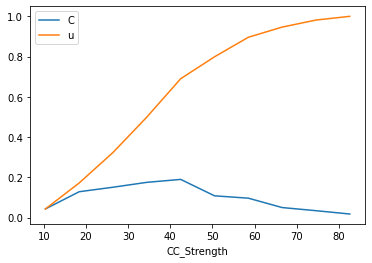

In [17]:
counts,bin_edges= np.histogram(df['CC_Strength'], bins= 10, density = True)
print("counts")
plt.xlabel('CC_Strength')
pdf = counts/sum(counts)
print(pdf)
print('bin_edges')
print(bin_edges)
cdf = np.cumsum(pdf)
print('cdf')
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('Cummulative Distribution Function')




#### This was obtained using a univariable i.e 'CC_Strength' together with cummulative distribution function and probaility density function

#### If a straight line is drawn from CC_Strength value of 70 then intersecting with the curve the cummulative distribution function  at value 0.8
#### There is an 80% Strength cummulative from 30 - 70

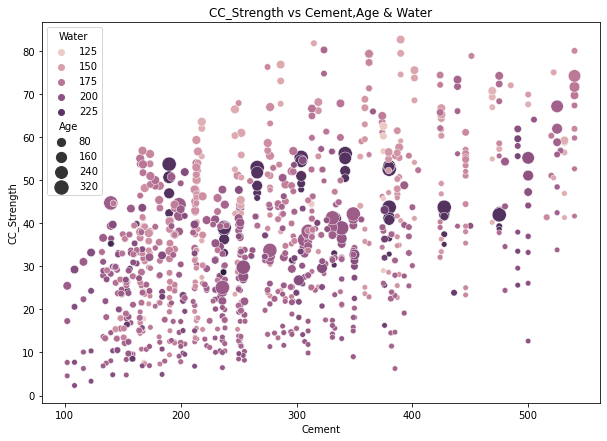

In [18]:
fig,ax = plt.subplots(figsize =(10,7))
sns.scatterplot(y= 'CC_Strength',x='Cement',hue='Water',size='Age',data=df,ax=ax,sizes=(30,200))
ax.set_title("CC_Strength vs Cement,Age & Water")
plt.show()

#### Observations Gotten From the Compressive Strength against Cement,Age & Water

#### 1.Compressive strength increases with increase in cement.
#### 2.The lesser the age of concrete the more cement it requires for higher strength.
#### 3.Decrease in water content improves compressive strength.
#### 4.The compressive strength of concrete improves with age.
#### 5.The more the cement the more water it requires.

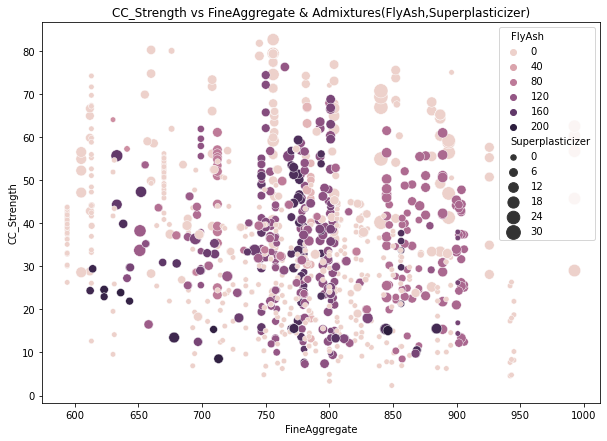

In [19]:
fig,ax = plt.subplots(figsize =(10,7))
sns.scatterplot(y= 'CC_Strength',x='FineAggregate',hue='FlyAsh',size='Superplasticizer',data=df,ax=ax,sizes=(30,200))
ax.set_title("CC_Strength vs FineAggregate & Admixtures(FlyAsh,Superplasticizer)")
plt.show()

#### Observations Gotten From Compressive Strength Against FineAggregate & Admixtures(FlyAsh,Superplasticizer)

#### 1.Compressive strength increases with decrease in Flyash
#### 2.Strength does not increase with increase in fine aggregates
#### 3. Strength moderately increases with increase in superplasticizer

## Data Preprocessing

#### Seperating Dependent And Independent Variables

In [20]:
#Features
x =df.iloc[:,:-1]
#Target
y =df.iloc[:,-1]

## Split Dataset Into Testing And Training Datasets

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=2)

## Scaling Of The Data
##### which involves standardizing the data to rescale it and have a mean of zero and a standard deviation of 1
##### The scaler is fit on on the training data and not on the test data.We are training our data to be rescaled and the model performs efficiently when the test data follows the same distribution.If the scaler is fit in the test data it would result in test data having a diffrent mean and standard deviation which would cause a lag in performance

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## We'll Start Building Our Machine Learning Model

#### Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. Linear relationship between variables means that when the value of one or more independent variables will change (increase or decrease), the value of dependent variable will also change accordingly (increase or decrease).


#### 1.Linear Regression
#### 2.Lasso Regression
#### 3.Ridge regression


In [23]:
lr = LinearRegression()
#LinearRegression

lasso = Lasso()
#LassoRegression

ridge = Ridge()
#RidgeRegression

## Fit Models On Training Dataset

In [24]:
lr.fit(x_train,y_train)
#Fitting the linear regression model

LinearRegression()

In [25]:
lasso.fit(x_train,y_train)
#Fitting the LassoRegression model

Lasso()

In [26]:
ridge.fit(x_train,y_train)
#Fitting the RidgeRession model

Ridge()

In [27]:
y_pred_lr = lr.predict(x_test)
#Predicting the test with Linear Regression model


In [28]:
y_pred_lasso = lasso.predict(x_test)
#Predicting the test with the Lasso Regression model

In [29]:
y_pred_ridge = ridge.predict(x_test)
#Predicting the test with the Ridge Regression Model

## Comparing The Values Of The Actual Compressive Strength Of Concrete And The Predicted Values

In [33]:
lr_prediction = pd.DataFrame({'Actual CC_Strength': y_test, 'Predicted CC_strength' : y_pred_lr})
lr_prediction

,Actual CC_Strength,Predicted CC_strength
456,43.39,27.590409
988,16.50,22.638788
809,19.69,17.852539
581,12.37,32.280167
549,41.68,31.694516
...,...,...
839,26.86,26.224019
455,51.26,37.906836
691,6.81,19.115393
934,22.93,26.762318


In [34]:
lasso_prediction = pd.DataFrame({'Actual CC_Strength': y_test, 'Predicted CC_strength' : y_pred_lasso})
lasso_prediction

,Actual CC_Strength,Predicted CC_strength
456,43.39,28.865435
988,16.50,25.200413
809,19.69,24.944842
581,12.37,29.979119
549,41.68,34.413127
...,...,...
839,26.86,29.505180
455,51.26,35.379187
691,6.81,23.307807
934,22.93,24.273009


In [35]:
ridge_prediction = pd.DataFrame({'Actual CC_Strength': y_test, 'Predicted CC_strength' : y_pred_ridge})
ridge_prediction

,Actual CC_Strength,Predicted CC_strength
456,43.39,27.535964
988,16.50,22.670146
809,19.69,17.945926
581,12.37,32.206677
549,41.68,31.757480
...,...,...
839,26.86,26.279463
455,51.26,37.888884
691,6.81,19.171136
934,22.93,26.772604


## Model Evaluation Comparing Root Mean Squared Error(RMSE),Mean Squared Error,(MSE),Mean Absolute Error(MAE),R2 Score

In [44]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_lr)), 
    mean_squared_error(y_test,y_pred_lr), mean_absolute_error(y_test,y_pred_lr), r2_score(y_test,y_pred_lr)))

Model			 RMSE		 MSE		 MAE		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57


In [45]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_lasso)), 
    mean_squared_error(y_test,y_pred_lasso), mean_absolute_error(y_test,y_pred_lasso), r2_score(y_test,y_pred_lasso)))

Model			 RMSE		 MSE		 MAE		 R2
LassoRegression 	 10.68 		 114.11 	8.65 		0.54


In [46]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_ridge)), 
    mean_squared_error(y_test,y_pred_ridge), mean_absolute_error(y_test,y_pred_ridge), r2_score(y_test,y_pred_ridge)))

Model			 RMSE		 MSE		 MAE		 R2
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


In [47]:
print("Model\t\t\t RMSE\t\t MSE\t\t MAE\t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_lr)), 
    mean_squared_error(y_test,y_pred_lr), mean_absolute_error(y_test,y_pred_lr), r2_score(y_test,y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_lasso)), 
    mean_squared_error(y_test,y_pred_lasso), mean_absolute_error(y_test,y_pred_lasso), r2_score(y_test,y_pred_lasso)))

print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_ridge)), 
    mean_squared_error(y_test,y_pred_ridge), mean_absolute_error(y_test,y_pred_ridge), r2_score(y_test,y_pred_ridge)))

Model			 RMSE		 MSE		 MAE		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LassoRegression 	 10.68 		 114.11 	8.65 		0.54
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


#### Performance of all 3 linear regression models are similar cause their netric evalution are very close

## Plot The Predictions

Text(0.5, 1.0, 'Linear regression')

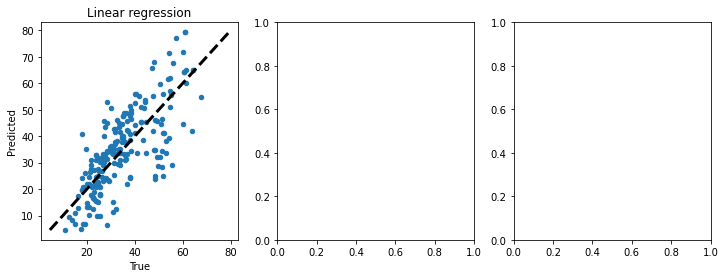

In [48]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize= (12, 4))
ax1.scatter(y_pred_lr,y_test, s=20)
ax1.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
ax1.set_title('Linear regression')

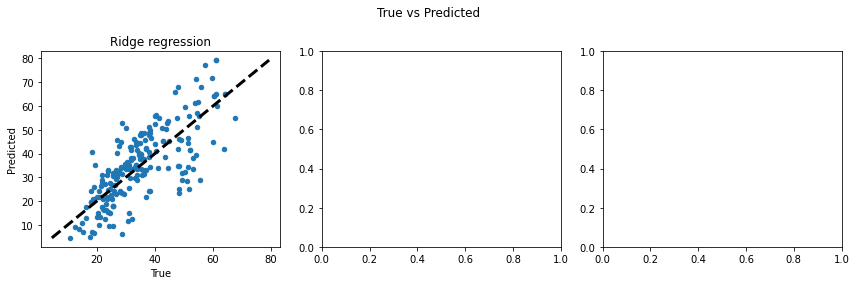

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (12, 4))
ax1.scatter(y_pred_ridge,y_test, s=20)
ax1.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
ax1.set_title('Ridge regression')
fig.suptitle('True vs Predicted')
fig.tight_layout()

Text(0.5, 1.0, 'Lasso regression')

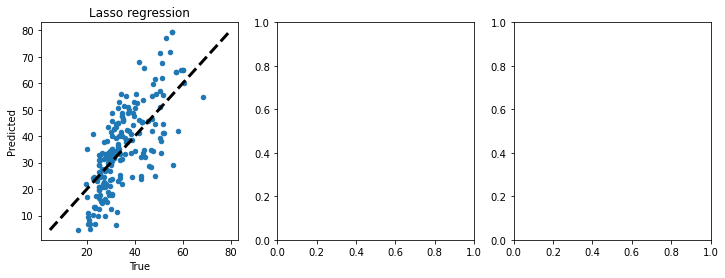

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (12, 4))
ax1.scatter(y_pred_lasso,y_test, s=20)
ax1.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--', lw = 3)
ax1.set_xlabel('True')
ax1.set_ylabel('Predicted')
ax1.set_title('Lasso regression')


#### From the graphs we'll conclude that linear and ridge regression algorithms perform well as predictions as they are closer to the actual values of the compressive strength of concrete

## Applying The Decison Tree Algorithm To Predict The Compressive Strength of Concrete

In [51]:
from sklearn import tree
dt = tree.DecisionTreeRegressor()
#importing the desicion tree Algorithm

In [52]:
dt = dt.fit(x_train, y_train)
#fitting the training dataset

In [59]:
y_pred_dt = dt.predict(x_test)
y_pred_dt
#predictied values of the compressive strength of concrete using the decision tree algorithm

array([31.35 , 16.5  , 19.77 , 17.2  , 34.68 , 51.96 , 52.5  , 29.355,
       24.89 ,  4.78 , 33.31 , 25.89 , 44.42 , 42.42 , 41.2  , 44.42 ,
       19.99 , 36.15 , 62.5  , 31.35 , 24.5  , 31.65 , 36.56 ,  6.9  ,
       51.04 , 26.92 , 39.7  , 33.04 , 12.18 , 31.45 , 55.55 , 22.53 ,
       23.25 , 24.1  , 53.66 , 24.05 , 23.25 , 18.91 , 49.77 , 32.72 ,
       44.21 , 27.77 , 27.22 , 33.02 , 55.5  , 40.66 , 26.85 , 17.54 ,
       55.6  , 33.31 , 13.2  , 31.12 , 65.2  , 65.91 , 28.99 , 47.81 ,
       13.2  , 48.79 , 42.55 , 38.46 , 71.3  , 46.23 , 31.12 , 29.93 ,
       41.54 , 13.71 , 25.56 , 39.7  , 79.3  , 14.7  , 30.14 , 23.25 ,
       46.24 , 39.7  , 48.79 , 23.89 , 21.07 , 27.22 , 35.23 , 25.48 ,
       37.43 , 25.46 , 24.5  , 14.7  , 50.24 , 17.82 , 11.98 , 25.51 ,
       36.99 , 60.95 , 15.09 , 47.13 , 29.93 ,  6.47 , 33.31 ,  9.01 ,
       56.81 , 25.69 , 17.96 , 23.52 , 24.1  , 11.41 , 30.65 , 34.67 ,
       29.73 , 25.51 , 45.37 , 29.65 , 26.06 , 49.2  , 52.61 , 64.3  ,
      

In [54]:
Decision_tree_prediction = pd.DataFrame({'Actual CC_Strength': y_test, 'Predicted CC_strength' : y_pred_dt})
Decision_tree_prediction

,Actual CC_Strength,Predicted CC_strength
456,43.39,31.35
988,16.50,16.50
809,19.69,19.77
581,12.37,17.20
549,41.68,34.68
...,...,...
839,26.86,26.86
455,51.26,51.43
691,6.81,9.56
934,22.93,24.05


### Finding The Mean Squared Error Of The Decision Tree Algorithm

In [57]:
mse = mean_squared_error(y_test,y_pred_dt)
mse

46.73788264563107

In [58]:
#finding the root mean square error
rmse = np.sqrt(mse)
rmse

6.836510999452211

## Model Deployment Using Gradio

In [60]:
!pip install gradio

In [61]:
import gradio as gr

In [62]:
def predict_CC_Strength(Cement,BlastFurnanceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age):
    X = np.array([Cement,BlastFurnanceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age])
    pred = dt.predict(X.reshape(1, -1))
    return pred

In [68]:
cement = gr.inputs.Number(label = 'Cement')
blast_furnance_slag = gr.inputs.Number(label = 'BlastFurnanceSlag')
fly_ash = gr.inputs.Number(label = 'FlyAsh')
water = gr.inputs.Number(label = 'Water')
super_plasticizer = gr.inputs.Number(label = 'Superplasticizer')
coarse_aggregate = gr.inputs.Number(label = 'CoarseAggregate')
fine_aggregate = gr.inputs.Number(label = 'FineAggregate')
age = gr.inputs.Number(label = 'Age')
output = gr.outputs.Textbox(label = 'Concrete Compressive Strength')

In [69]:
app = gr.Interface(predict_CC_Strength, inputs = [cement,blast_furnance_slag,fly_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age], outputs=output, description='This is for the prediction of concrete compressive strengrh')

In [70]:
app.launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x20f2aa4dd60>,
 'http://127.0.0.1:7861/',
 None)